In [30]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as scs
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [32]:
market = "SPY"
symbol = 'AAPL'
start = '2021-08-20'
end = '2022-08-20'
data = yf.download(symbol,start,end)
stock_market = yf.download(market, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
from datetime import datetime
def days_between(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    n = abs((end - start).days)
    return n
days_between(start, end)

365

In [34]:
start = datetime.strptime(start, "%Y-%m-%d")
end = datetime.strptime(end, "%Y-%m-%d")
n = abs((end - start).days)

In [35]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364227,60549600
2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875778,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,148.786255,48606400
2021-08-25,149.809998,150.320007,147.800003,148.360001,147.533279,58991300
2021-08-26,148.350006,149.119995,147.509995,147.539993,146.717865,48597200


In [36]:
stock_market.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,440.230011,443.709991,439.709991,443.359985,437.144653,72008700
2021-08-23,445.160004,448.230011,443.440002,447.260010,440.990021,54973000
2021-08-24,447.970001,448.540009,447.420013,447.970001,441.690063,38744700
2021-08-25,448.170013,449.459991,447.769989,448.910004,442.616882,40529700
2021-08-26,448.609985,448.859985,446.160004,446.260010,440.004059,57829600


In [37]:
rf = 0.01
close_px = data[ 'Adj Close']
returns = close_px.pct_change().dropna()
p = np.array(data['Adj Close'])
mp = np.array(stock_market['Adj Close']) 
dollar_vol = np.array(data['Volume']*p)
market_dollar_vol = np.array(stock_market['Volume']*mp)
benchmark = stock_market['Adj Close'].pct_change().dropna()
excess_returns = np.array(returns) - np.array(benchmark)
data['returns'] = data[ 'Adj Close'].pct_change().dropna()
benchmark['returns'] = stock_market['Adj Close'].pct_change().dropna()
data['rea_var'] = 252 * np.cumsum(data['returns']**2) / np.arange(len(data))
data['rea_vol'] = np.sqrt(data['rea_var'])

In [38]:
def adj_close_statistics(close_px):
	sta = scs.describe(close_px)
	print("%14s %15s" % ('statistic', 'value'))
	print(30 * "-")
	print("%14s %15.5f" % ('size', sta[0]))
	print("%14s %15.5f" % ('min', sta[1][0]))
	print("%14s %15.5f" % ('max', sta[1][1]))
	print("%14s %15.5f" % ('mean', sta[2]))
	print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
	print("%14s %15.5f" % ('skew', sta[4]))
	print("%14s %15.5f" % ('kurtosis', sta[5]))
adj_close_statistics(close_px) 

     statistic           value
------------------------------
          size       252.00000
           min       129.87959
           max       181.25993
          mean       157.26105
           std        12.56796
          skew         0.01275
      kurtosis        -1.13384


In [39]:
def print_stock_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(returns))
    print("Std  of Daily  Log Returns %9.6f" % np.std(returns))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(returns) * 252))
    print("Std  of Annua. Log Returns %9.6f" % (np.std(returns) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(returns))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(returns)[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(returns))
    print("Kurt Normal Test p-value   %9.6f" % \
                scs.kurtosistest(returns)[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % \
                scs.normaltest(returns)[1])
    print("---------------------------------------------")
    print("Realized Volatility        %9.6f" % data['rea_vol'].iloc[-1])
    print("Realized Variance          %9.6f" % data['rea_var'].iloc[-1])
    print("---------------------------------------------")
    print("Anderson Normality Test:		   ")
    print(stats.anderson(returns))
    print("---------------------------------------------")
    print("Shapiro_Wilk Test: 		      			")
    print(stats.shapiro(returns))
    print("Sharpe Ratio of Daily Returns:  			")
    print("{0:.8f}".format(np.mean(returns) / np.std(returns)))
    print("Trading Sharpe for Daily:      			")
    print("{0:.8f}".format((n*6.5) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(n*6.5))))
    print("Sharpe of Annua. Returns w/ days:      	")
    print("{0:.8f}".format((252) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(252))))
    print("Sharpe of Annua. Returns w/ days & hours:")
    print("{0:.8f}".format((252*6.5) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(252*6.5))))
    print("---------------------------------------------")
    print("Amihud Illiquidity 		  %9.6g" % np.mean(np.divide(abs(returns),dollar_vol[1:])))
    print("---------------------------------------------")
    print("Kelly Formula:			       ")
    print("{0:.8f}".format(np.mean(returns) - rf // (np.std(returns))**2))
    print("Compounded Levered Return: 	   ")
    print("{0:.8f}".format(rf + (((252) * (np.mean(returns)-rf / np.std(returns)*np.sqrt(252)))**2) // 2))
    print("Compounded Unlevered Return:    ")
    print("{0:.8f}".format(((np.mean(returns))*252)-(((np.std(returns))*np.sqrt(252))**2) // 2))
    return

print_stock_statistics(data)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000789
Std  of Daily  Log Returns  0.019166
Mean of Annua. Log Returns  0.198777
Std  of Annua. Log Returns  0.304249
---------------------------------------------
Skew of Sample Log Returns -0.103357
Skew Normal Test p-value    0.493023
---------------------------------------------
Kurt of Sample Log Returns  0.479849
Kurt Normal Test p-value    0.122555
---------------------------------------------
Normal Test p-value         0.239993
---------------------------------------------
Realized Volatility         0.304506
Realized Variance           0.092724
---------------------------------------------
Anderson Normality Test:		   
AndersonResult(statistic=0.6129952833065602, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
---------------------------------------------
Shapiro_Wilk Test: 		      			
ShapiroResult(statisti

In [40]:
def print_market_information(benchmark):
    print("RETURN BENCHMARK STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(benchmark['returns']))
    print("Std  of Daily  Log Returns %9.6f" % np.std(benchmark['returns']))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(benchmark['returns']) * 252))
    print("Std  of Annua. Log Returns %9.6f" % (np.std(benchmark['returns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(benchmark['returns']))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(benchmark['returns']))
    print("Kurt Normal Test p-value   %9.6f" % scs.kurtosistest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % scs.normaltest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Anderson Normality Test:		   ")
    print(stats.anderson(benchmark['returns']))
    return
print_market_information(benchmark)

RETURN BENCHMARK STATISTICS
---------------------------------------------
Mean of Daily  Log Returns -0.000054
Std  of Daily  Log Returns  0.013005
Mean of Annua. Log Returns -0.013689
Std  of Annua. Log Returns  0.206451
---------------------------------------------
Skew of Sample Log Returns -0.309029
Skew Normal Test p-value    0.044208
---------------------------------------------
Kurt of Sample Log Returns  0.474824
Kurt Normal Test p-value    0.125376
---------------------------------------------
Normal Test p-value         0.040814
---------------------------------------------
Anderson Normality Test:		   
AndersonResult(statistic=0.8743037895172279, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


alpha 	=  0.0008570092263623613
beta  	=  1.2556896817015106
r_squared	=  0.8520597153350722
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     659.8
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           5.90e-72
Time:                        16:26:46   Log-Likelihood:                 798.94
No. Observations:                 251   AIC:                            -1594.
Df Residuals:                     249   BIC:                            -1587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

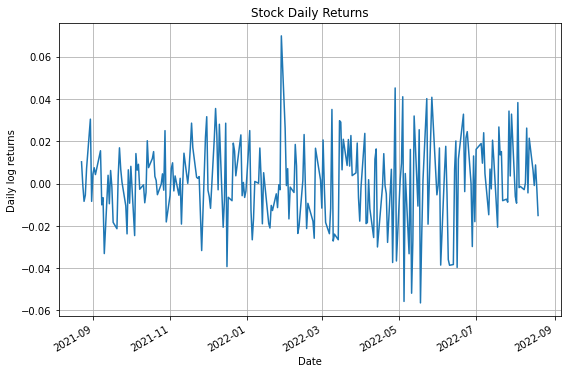

<Figure size 648x360 with 0 Axes>

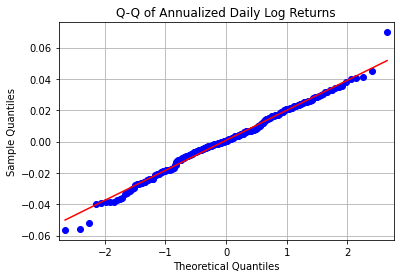

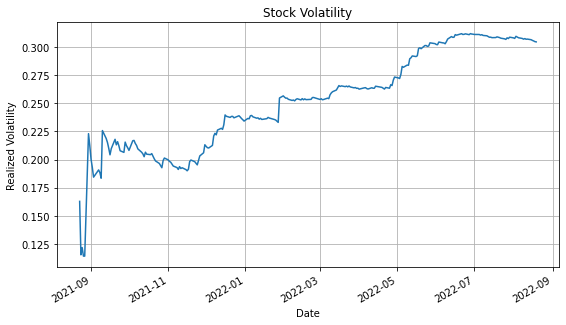

In [42]:
def linreg(returns, benchmark):
    X = benchmark
    y = returns
    beta, intercept, r_squared, p_value, std_err = stats.linregress(X, y)
    alpha = np.mean(y) - beta * np.mean(X)
    print("alpha 	= ", alpha)
    print("beta  	= ", beta)
    print("r_squared	= ", r_squared)
    return beta, alpha, r_squared
def print_market_stock(returns, benchmark):
	y = returns
	x = benchmark
	x = sm.add_constant(x)
	model = sm.OLS(y,x)
	results = model.fit()
	print(results.summary())
def quotes_returns(returns):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    data['returns'].plot()
    plt.title('Stock Daily Returns')
    plt.ylabel('Daily log returns')
    plt.grid(True)
    plt.axis('tight')
def return_histogram(returns):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(returns), max(returns), 100)
    plt.hist(np.array(returns), bins=50, normed=True)
    y = np(x, np.mean(returns), np.std(returns))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('Log Returns')
    plt.ylabel('Frequency/Probability')
    plt.grid(True)
def return_qqplot(returns):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(returns, line='s')
    plt.grid(True)
    plt.title('Q-Q of Annualized Daily Log Returns')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
def realized_volatility(returns):
    ''' Plots the realized volatility. '''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot()
    plt.title('Stock Volatility')
    plt.ylabel('Realized Volatility')
    plt.grid(True)
if __name__ == '__main__':
    linreg(returns, benchmark['returns'])
    print_market_stock(returns, benchmark['returns'])
    quotes_returns(returns)
    return_qqplot(returns)
    realized_volatility(returns)